<img src=https://uniandes.edu.co/sites/default/files/logo-uniandes.png>

Estudiantes:

Integrante 1: David Guillermo Guerrero Calderón 	Código: 201113487

Integrante 2: Jhon Jairo Melo Jiménez 			    Código: 201818750

Integrante 3: Julián David Moreno Marin 			Código: 200822194

Integrante 4: Oscar Iván Castro Buitrago 		    Código: 201315998

Integrante 5: Wilson Camilo Sánchez Forero          Código: 201820379


In [1]:
# Importamos Librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf

Se importa la base MultiTimeline correspondiente a la seria de tiempo de la busqueda en Zoom, las cifras se encuentran están en millones.

Exercise 05

The result will be evaluated from a report in Jupyter, which must be found in a public GitHub repository. The project must be carried out in the groups assigned in class. Use clear and rigorous procedures. Due date: July 11, 2021, 11:59 pm, through Bloque Neón + (Upload repository link)

Using the example_retail_sales dataset:
1. Standardize the dataset using np.log
2. Using prophet forescast the next 6 months of the sales logarithm
3. Predict the next 6 months of sales

In [24]:
df_sales = pd.read_csv('example_retail_sales.csv', header=0, index_col=0)

In [25]:
df_sales.head()

,y
ds,
1992-01-01,146376
1992-02-01,147079
1992-03-01,159336
1992-04-01,163669
1992-05-01,170068


In [26]:
df_sales.dtypes

y    int64
dtype: object

In [27]:
from prophet import Prophet
from prophet.plot import add_changepoints_to_plot

C:\Users\Home\AppData\Roaming\Python\Python38\site-packages\pandas\plotting\_matplotlib\core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:xlabel='ds'>

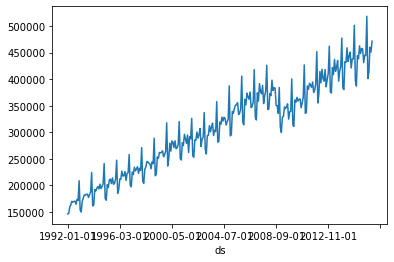

In [28]:
df_sales['y'].plot()

In [29]:
df_sales['y'] = np.log(df_sales['y'])

In [30]:
df_sales.head()

,y
ds,
1992-01-01,11.893934
1992-02-01,11.898725
1992-03-01,11.978770
1992-04-01,12.005601
1992-05-01,12.043954


C:\Users\Home\AppData\Roaming\Python\Python38\site-packages\pandas\plotting\_matplotlib\core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:xlabel='ds'>

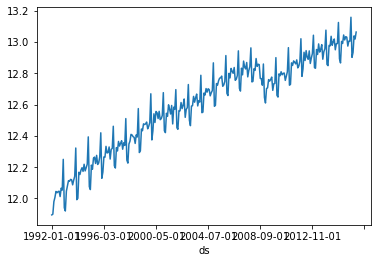

In [31]:
df_sales['y'].plot()

In [32]:
df_sales.dtypes

y    float64
dtype: object

In [33]:
df_sales['ds'] = df_sales.index

In [34]:
pd.to_datetime(df_sales['ds'])

ds
1992-01-01   1992-01-01
1992-02-01   1992-02-01
1992-03-01   1992-03-01
1992-04-01   1992-04-01
1992-05-01   1992-05-01
                ...    
2016-01-01   2016-01-01
2016-02-01   2016-02-01
2016-03-01   2016-03-01
2016-04-01   2016-04-01
2016-05-01   2016-05-01
Name: ds, Length: 293, dtype: datetime64[ns]

In [35]:
df_sales['ds'].head(30)

ds
1992-01-01    1992-01-01
1992-02-01    1992-02-01
1992-03-01    1992-03-01
1992-04-01    1992-04-01
1992-05-01    1992-05-01
1992-06-01    1992-06-01
1992-07-01    1992-07-01
1992-08-01    1992-08-01
1992-09-01    1992-09-01
1992-10-01    1992-10-01
1992-11-01    1992-11-01
1992-12-01    1992-12-01
1993-01-01    1993-01-01
1993-02-01    1993-02-01
1993-03-01    1993-03-01
1993-04-01    1993-04-01
1993-05-01    1993-05-01
1993-06-01    1993-06-01
1993-07-01    1993-07-01
1993-08-01    1993-08-01
1993-09-01    1993-09-01
1993-10-01    1993-10-01
1993-11-01    1993-11-01
1993-12-01    1993-12-01
1994-01-01    1994-01-01
1994-02-01    1994-02-01
1994-03-01    1994-03-01
1994-04-01    1994-04-01
1994-05-01    1994-05-01
1994-06-01    1994-06-01
Name: ds, dtype: object

In [36]:
df_sales.dtypes

y     float64
ds     object
dtype: object

In [37]:
m = Prophet()
m.fit(df_sales)

INFO:numexpr.utils:Note: NumExpr detected 16 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
INFO:numexpr.utils:NumExpr defaulting to 8 threads.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [47]:
future = m.make_future_dataframe(periods= 6, freq='M')
future.tail(20)

,ds
279,2015-04-01
280,2015-05-01
281,2015-06-01
282,2015-07-01
283,2015-08-01
284,2015-09-01
285,2015-10-01
286,2015-11-01
287,2015-12-01
288,2016-01-01


In [39]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
294,2016-06-30,13.057700,13.037761,13.079367
295,2016-07-31,13.082357,13.061549,13.102938
296,2016-08-31,13.015546,12.995279,13.035171
297,2016-09-30,13.037862,13.017035,13.058124
298,2016-10-31,13.055691,13.034330,13.077878


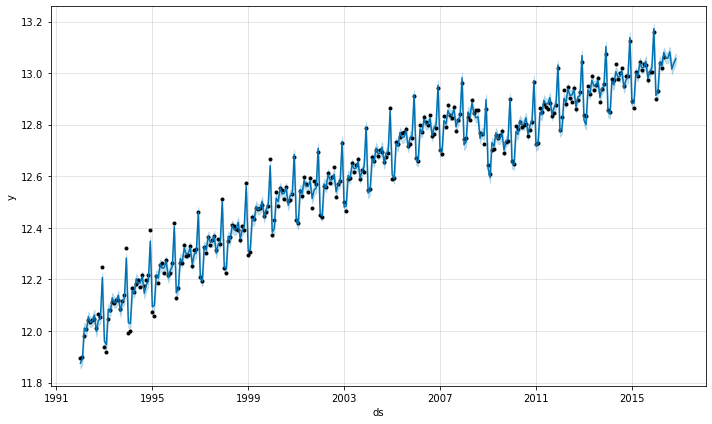

In [40]:
fig1 = m.plot(forecast)

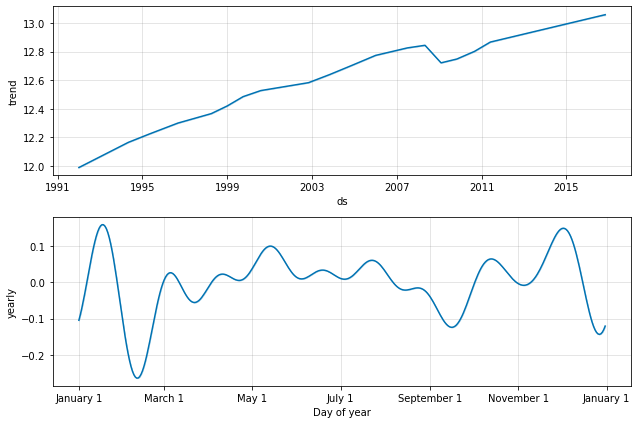

In [41]:
m.plot_components(forecast);


In [42]:
forecast['yhat'] = np.exp(forecast['yhat'])
forecast['yhat_lower'] = np.exp(forecast['yhat_lower'])
forecast['yhat_upper'] = np.exp(forecast['yhat_upper'])

In [43]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
294,2016-06-30,468691.356647,459438.946104,478957.222894
295,2016-07-31,480391.638076,470498.757387,490381.237817
296,2016-08-31,449345.055888,440329.674692,458250.347983
297,2016-09-30,459485.022441,450014.386601,468890.340429
298,2016-10-31,467751.040477,457865.265388,478244.836829


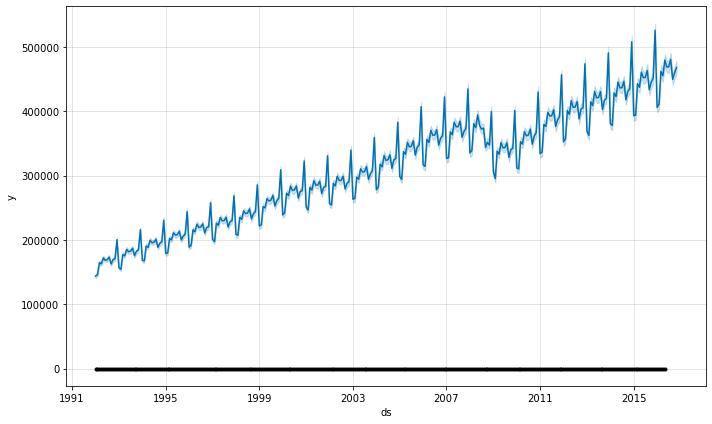

In [44]:
fig1 = m.plot(forecast)

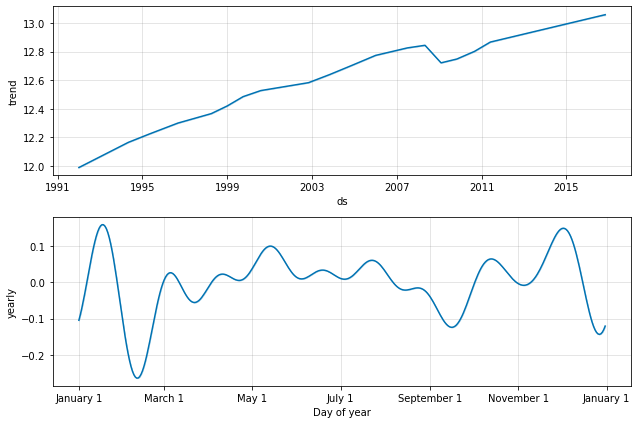

In [45]:
m.plot_components(forecast);